In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [2]:
store_df = pd.read_csv('sample-store.csv').set_index('Row ID')
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])

In [3]:
x = pd.DataFrame(store_df['Order Date']).set_index('Order Date')
y = pd.DataFrame(store_df[['Order Date','Sales','Profit','Quantity']]).set_index('Order Date')

In [4]:
x['dayofweek'] = x.index.dayofweek
x['dayofyear'] = x.index.dayofyear
x['month'] = x.index.month
x['quarter'] = x.index.quarter
x['year'] = x.index.year

In [5]:
model = LinearRegression(normalize=True)
model.fit(x,y['Sales'])

LinearRegression(normalize=True)

In [6]:
y['Predicted'] = model.predict(x)

In [7]:
mean_absolute_percentage_error(y['Predicted'],y['Sales'])

1.1663110857247305

In [8]:
np.sqrt(mean_squared_error(y['Predicted'],y['Sales']))

623.163428898391

In [9]:
y.plot(y.index, y['Sales'].groupby(y.index.month).sum())
y.plot(y.index.groupby(y.index.month), y['Predicted'].groupby(y.index.month).sum())

KeyError: "None of [Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')] are in the [columns]"

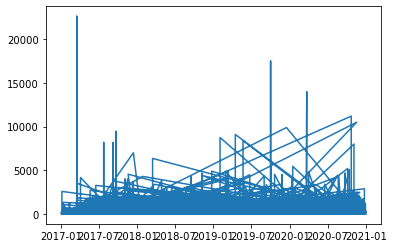

In [25]:
plt.plot(y['Sales'].groupby(y.index))

Sales        0
Profit       0
Quantity     0
Predicted    0
dtype: int64